In [1]:
import sys
from os.path import join
import numpy as np
import importlib
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
PROJ_DIR = '/home/gcgreen2/alignment'
ALN_DIR = join(PROJ_DIR, 'out/mh')
GT_DIR = join(PROJ_DIR, 'spectral_jaccard_similarity/groundTruths')
DATASETS = np.loadtxt(join(PROJ_DIR,'NCTC_list.txt'), dtype=str)

In [7]:
def load_dfs(dataset): # load the alignment files
    gt_path = join(GT_DIR, dataset+'_daligner_ground_truth.txt')
    aln_path = join(ALN_DIR, dataset+'_aln.tsv')
    gt_df = pd.read_csv(gt_path, sep='\t', header=None, names=['i1','i2','overlap','l1','l2'])
    aln_df = pd.read_csv(aln_path, sep='\t', header=None, names=['i1','i2','overlap','l1','l2'])
    return gt_df, aln_df

In [8]:
def get_overlaps(gt_df, aln_df):
    overlaps = {}
    for i in range(len(gt_df)):
        line = gt_df.iloc[i]
        pair = tuple([line.i1, line.i2])
        overlaps[pair] = [line.overlap, 0]

    for i in range(len(aln_df)):
        line = aln_df.iloc[i]
        pair = tuple([line.i1, line.i2])
        if pair in overlaps:
            overlaps[pair][1] = line.overlap
        else:
            overlaps[pair] = [0, line.overlap]

    return np.array(list(overlaps.values()))

In [11]:
overlaps = get_overlaps(*load_dfs(DATASETS[0]))

Text(0.5, 1.0, 'GT vs. Alignment')

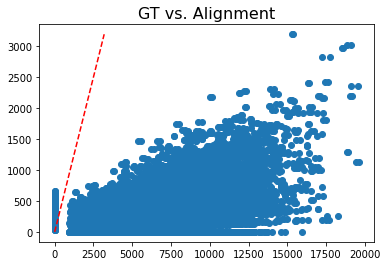

In [17]:
plt.plot(overlaps[:,0],overlaps[:,1],'o')
plt.plot([0,overlaps[:,1].max()], [0,overlaps[:,1].max()], '--', color='red')
plt.title('GT vs. Alignment',fontsize=16)

In [2]:
a=lambda x: x
